# Importing the data

In [8]:
import pickle 
import numpy as np

#LiH
with open('../Final data/Pre ML Data/LiH/LiH_True_Energies.pkl', 'rb') as infile:
    LiH_True_Energies = pickle.load(infile)

with open('../Final data/Pre ML Data/LiH/LiH_SA_1_ZAF_1_Params.pkl', 'rb') as infile:
    LiH_SA_1_ZAF_1_Params = pickle.load(infile)

with open('../Final data/Pre ML Data/LiH/LiH_SA_1_ZAF_1_Energies.pkl', 'rb') as infile:
    LiH_SA_1_ZAF_1_Energies = pickle.load(infile)

with open('../Final data/Pre ML Data/LiH/LiH_SA_1_ZAF_1_Time.pkl', 'rb') as infile:
    LiH_SA_1_ZAF_1_Time = pickle.load(infile)

with open('../Final data/Pre ML Data/LiH/LiH_spin_adapted_Removable_Idx.pkl', 'rb') as infile:
    LiH_spin_adapted_Removable_Idx = pickle.load(infile)

with open('../Final data/Pre ML Data/LiH/LiH_nonspin_adapted_Removable_Idx.pkl', 'rb') as infile:
    LiH_nonspin_adapted_Removable_Idx = pickle.load(infile)
    
    
    
# with open('../Final data/ML Data/LiH/Combination 9/LiH_L_BFGS_B_Energies.pkl', 'wb') as outfile:
#     pickle.dump(LiH_L_BFGS_B_Energies, outfile, pickle.HIGHEST_PROTOCOL)
with open('../Final data/ML Data/LiH/Combination 9/LiH_L_BFGS_B_Energies.pkl', 'rb') as infile:
    LiH_L_BFGS_B_Energies = pickle.load(infile)
        
# with open('../Final data/ML Data/LiH/Combination 9/LiH_L_BFGS_B_Time.pkl', 'wb') as outfile:
#     pickle.dump(LiH_L_BFGS_B_Time, outfile, pickle.HIGHEST_PROTOCOL)
with open('../Final data/ML Data/LiH/Combination 9/LiH_L_BFGS_B_Time.pkl', 'rb') as infile:
    LiH_L_BFGS_B_Time = pickle.load(infile)
    
with open('../Final data/ML Data/LiH/Combination 9/LiH_Combination_9.pkl', 'rb') as infile:
    LiH_Combination_9 = pickle.load(infile)

# ML Assisted UCC Algorithm

## Defining some function

In [2]:
def perform_spin_adaptation(relevant_excitations):
    global t_i_a, t_I_A, t_ij_ab, t_IJ_AB, t_iJ_aB, t_iJ_Ab, t_iJ_aA, t_Ij_Ab, t_Ij_aB, t_Ij_aA, t_iI_aB, t_iI_Ab, t_iI_aA
    global spin_nonadapted_exct
    global nonadapted_t_i_a_idx, nonadapted_t_I_A_idx, nonadapted_t_ij_ab_idx, nonadapted_t_IJ_AB_idx, nonadapted_t_iJ_aB_idx, nonadapted_t_Ij_Ab_idx, nonadapted_t_iJ_Ab_idx, nonadapted_t_Ij_aB_idx, nonadapted_t_iJ_aA_idx, nonadapted_t_Ij_aA_idx, nonadapted_t_iI_aB_idx, nonadapted_t_iI_Ab_idx, nonadapted_t_iI_aA_idx
    global spin_adapted_exct
    global adapted_t_i_a_idx, adapted_t_ij_ab_idx, adapted_t_iJ_aB_idx, adapted_t_iJ_aA_idx, adapted_t_iI_aB_idx, adapted_t_iI_aA_idx
    global nonadapted_exct_index_extractor
    global adapted_exct_index_extractor
    global adapted_to_nonadapted_idx


    singles = [i for i in relevant_excitations if len(i[0])==1]
    doubles = [i for i in relevant_excitations if len(i[0])==2]

    t_i_a = []
    for i in singles:
        if i[0][0]<nso:
            t_i_a.append(i)

    t_I_A = []
    for i in t_i_a:
        t_I_A.append(((i[0][0]+nso,), (i[1][0]+nso,)))




    t_ij_ab = []
    for i in doubles:
        if i[0][0]<nso and i[0][1]<nso:
            t_ij_ab.append(i)
    t_IJ_AB = []
    for i in t_ij_ab:
        t_IJ_AB.append(((i[0][0]+nso, i[0][1]+nso), (i[1][0]+nso, i[1][1]+nso)))



    t_iJ_aB = []
    for i in t_ij_ab:
        x = ((i[0][0], i[0][1]+nso), (i[1][0], i[1][1]+nso))
        if x in doubles:
            t_iJ_aB.append(x)
    for i in doubles:
        if i[0][0]<i[0][1]-nso and i[1][0]<i[1][1]-nso and i not in t_iJ_aB:
            t_iJ_aB.append(i)


    t_iJ_Ab = []
    for i in t_ij_ab:
        x = ((i[0][0], i[0][1]+nso), (i[1][1], i[1][0]+nso))
        if x in doubles:
            t_iJ_Ab.append(x)
    for i in t_iJ_aB:
        x = (i[0], (i[1][1]-nso, i[1][0]+nso))
        if x in doubles and x not in t_iJ_Ab:
            t_iJ_Ab.append(x)



    t_iJ_aA = []
    for i in doubles:
        if i[0][0]<i[0][1]-nso and i[1][0]==i[1][1]-nso:
            t_iJ_aA.append(i)




    t_Ij_Ab = []
    for i in t_iJ_aB:
        t_Ij_Ab.append( ((i[0][1]-nso, i[0][0]+nso), (i[1][1]-nso, i[1][0]+nso)) )

    t_Ij_aB = []
    for i in t_iJ_Ab:
        t_Ij_aB.append(((i[0][1]-nso, i[0][0]+nso), (i[1][1]-nso, i[1][0]+nso)))

    t_Ij_aA = []
    for i in t_iJ_aA:
        t_Ij_aA.append(((i[0][1]-nso, i[0][0]+nso), i[1]))




    t_iI_aB = []
    for i in doubles:
        if i[0][0]==i[0][1]-nso and i[1][0]<i[1][1]-nso:
            t_iI_aB.append(i)

    t_iI_Ab = []
    for i in t_iI_aB:
        t_iI_Ab.append((i[0], (i[1][1]-nso, i[1][0]+nso)))

    t_iI_aA = []
    for i in doubles:
        if i[0][0]==i[0][1]-nso and i[1][0]==i[1][1]-nso:
            t_iI_aA.append(i)

    spin_nonadapted_exct = t_i_a + t_I_A + t_ij_ab + t_IJ_AB + t_iJ_aB + t_Ij_Ab + t_iJ_Ab + t_Ij_aB + t_iJ_aA + t_Ij_aA + t_iI_aB + t_iI_Ab + t_iI_aA

    def nonadapted_exct_index_extractor (t_pq_rs):
        return [i for i in range(len(spin_nonadapted_exct)) if spin_nonadapted_exct[i] in t_pq_rs]
    nonadapted_t_i_a_idx = nonadapted_exct_index_extractor(t_i_a)
    nonadapted_t_I_A_idx = nonadapted_exct_index_extractor(t_I_A)
    nonadapted_t_ij_ab_idx = nonadapted_exct_index_extractor(t_ij_ab)
    nonadapted_t_IJ_AB_idx = nonadapted_exct_index_extractor(t_IJ_AB)
    nonadapted_t_iJ_aB_idx = nonadapted_exct_index_extractor(t_iJ_aB)
    nonadapted_t_Ij_Ab_idx = nonadapted_exct_index_extractor(t_Ij_Ab)
    nonadapted_t_iJ_Ab_idx = nonadapted_exct_index_extractor(t_iJ_Ab)
    nonadapted_t_Ij_aB_idx = nonadapted_exct_index_extractor(t_Ij_aB)
    nonadapted_t_iJ_aA_idx = nonadapted_exct_index_extractor(t_iJ_aA)
    nonadapted_t_Ij_aA_idx = nonadapted_exct_index_extractor(t_Ij_aA)
    nonadapted_t_iI_aB_idx = nonadapted_exct_index_extractor(t_iI_aB)
    nonadapted_t_iI_Ab_idx = nonadapted_exct_index_extractor(t_iI_Ab)
    nonadapted_t_iI_aA_idx = nonadapted_exct_index_extractor(t_iI_aA)

    spin_adapted_exct = t_i_a + t_ij_ab + t_iJ_aB + t_iJ_aA + t_iI_aB + t_iI_aA

    def adapted_exct_index_extractor (t_pq_rs):
        return [i for i in range(len(spin_adapted_exct)) if spin_adapted_exct[i] in t_pq_rs]
    adapted_t_i_a_idx = adapted_exct_index_extractor(t_i_a)
    adapted_t_ij_ab_idx = adapted_exct_index_extractor(t_ij_ab)
    adapted_t_iJ_aB_idx = adapted_exct_index_extractor(t_iJ_aB)
    adapted_t_iJ_aA_idx = adapted_exct_index_extractor(t_iJ_aA)
    adapted_t_iI_aB_idx = adapted_exct_index_extractor(t_iI_aB)
    adapted_t_iI_aA_idx = adapted_exct_index_extractor(t_iI_aA)

    def adapted_to_nonadapted_idx (T_pq_rs):
        try:
            idx = adapted_t_i_a_idx.index(T_pq_rs)
            return [nonadapted_t_i_a_idx[idx], nonadapted_t_I_A_idx[idx]]
        except ValueError:
            pass

        try:
            idx = adapted_t_ij_ab_idx.index(T_pq_rs)
            return [nonadapted_t_ij_ab_idx[idx], nonadapted_t_IJ_AB_idx[idx]]
        except ValueError:
            pass

        try:
            idx = adapted_t_iJ_aB_idx.index(T_pq_rs)
            return [nonadapted_t_iJ_aB_idx[idx], nonadapted_t_Ij_Ab_idx[idx]]
        except ValueError:
            pass

        try:
            idx = adapted_t_iJ_aA_idx.index(T_pq_rs)
            return [nonadapted_t_iJ_aA_idx[idx], nonadapted_t_Ij_aA_idx[idx]]
        except ValueError:
            pass

        try:
            idx = adapted_t_iI_aB_idx.index(T_pq_rs)
            return [nonadapted_t_iI_aB_idx[idx], nonadapted_t_iI_Ab_idx[idx]]
        except ValueError:
            pass

        try:
            idx = adapted_t_iI_aA_idx.index(T_pq_rs)
            return [nonadapted_t_iI_aA_idx[idx]]
        except ValueError:
            pass

## Spin adapted VQE function

In [3]:
from scipy.optimize import minimize

def adapted_energy_eval_func(adapted_params):
    global nonadapted_params
    nonadapted_params = np.zeros_like(t)
    # print (time.perf_counter() - t0)
    for i,j in zip([adapted_t_i_a_idx, adapted_t_ij_ab_idx, adapted_t_iJ_aB_idx, adapted_t_iJ_aA_idx, adapted_t_iI_aB_idx, adapted_t_iI_aA_idx], [nonadapted_t_i_a_idx, nonadapted_t_ij_ab_idx, nonadapted_t_iJ_aB_idx, nonadapted_t_iJ_aA_idx, nonadapted_t_iI_aB_idx, nonadapted_t_iI_aA_idx]):
        nonadapted_params[j] = adapted_params[i]
    nonadapted_params[nonadapted_t_I_A_idx] = adapted_params[adapted_t_i_a_idx]
    nonadapted_params[nonadapted_t_IJ_AB_idx] = adapted_params[adapted_t_ij_ab_idx]
    nonadapted_params[nonadapted_t_Ij_Ab_idx] = adapted_params[adapted_t_iJ_aB_idx]
    if len(nonadapted_t_iJ_Ab_idx) == len(nonadapted_t_ij_ab_idx) and len(nonadapted_t_iJ_Ab_idx) == len(nonadapted_t_iJ_aB_idx):
        nonadapted_params[nonadapted_t_iJ_Ab_idx] = adapted_params[adapted_t_ij_ab_idx] + adapted_params[adapted_t_iJ_aB_idx]    
    else:
        for i in nonadapted_t_iJ_Ab_idx:
            p = t_iJ_Ab[i-min(nonadapted_t_iJ_Ab_idx)]
            t1 = ((p[0][0], p[0][1]-nso), (p[1][1]-nso, p[1][0]))
            try:
                idx1 = t_ij_ab.index(t1)
                nonadapted_params[i] += adapted_params[adapted_t_ij_ab_idx[idx1]]
            except ValueError:
                pass
            t2 = ((p[0][0], p[0][1]), (p[1][1]-nso, p[1][0]+nso))
            try:
                idx2 = t_iJ_aB.index(t2)
                nonadapted_params[i] += adapted_params[adapted_t_iJ_aB_idx[idx2]]
            except ValueError:
                pass
    nonadapted_params[nonadapted_t_Ij_aB_idx] = nonadapted_params[nonadapted_t_iJ_Ab_idx]
    nonadapted_params[nonadapted_t_Ij_aA_idx] = adapted_params[adapted_t_iJ_aA_idx]
    nonadapted_params[nonadapted_t_iI_Ab_idx] = adapted_params[adapted_t_iI_aB_idx]
    a = energy_eval_func(nonadapted_params)
    return a



def spin_adapted_VQE(maxiter):
    global adapted_ordered_params
    global x_0
    adapted_ordered_params = np.zeros((len(UCC_op)))
    
    t0 = 0
    nonadapted_params = np.zeros_like(t)       #Will be used later
    print ('Energy at the initial parameter values: ', adapted_energy_eval_func(x_0) + result_exact.nuclear_repulsion_energy)

    iter_count = 0
    #Callback function for minimization


    def print_fun(adapted_params):
        global adapted_ordered_params
        adapted_ordered_params = np.concatenate((adapted_ordered_params, adapted_params.reshape(1,len(spin_adapted_exct))))
        global iter_count
        iter_count += 1
        print (iter_count)
        print (adapted_energy_eval_func(adapted_params) + result_exact.nuclear_repulsion_energy, '(time taken = %f)'%(time.perf_counter() - t0))
        print(np.flip(np.argsort(np.abs(adapted_params))))

    t0 = time.perf_counter()
    minimization_result = minimize(fun=adapted_energy_eval_func, x0=x_0, method='L-BFGS-B', tol = 1e-8, options={'maxiter': maxiter}, callback = print_fun)
    t1 = time.perf_counter()

    adapted_ordered_params = np.delete(adapted_ordered_params, (0), axis=0)

    UCC_E = adapted_energy_eval_func(adapted_ordered_params[-1,:]) + result_exact.nuclear_repulsion_energy
    print ('Final energy after minimization: ', UCC_E)  
    print ('Time ellapsed: ', t1-t0, '\n')

    return adapted_ordered_params

### Importing the modules

In [ ]:
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper, BravyiKitaevMapper
from qiskit.opflow.converters import TwoQubitReduction
import numpy as np 

from qiskit_nature.algorithms.ground_state_solvers.minimum_eigensolver_factories import NumPyMinimumEigensolverFactory
from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver
from qiskit_nature.circuit.library.initial_states.hartree_fock import *

from qiskit.opflow import *
from qiskit import Aer
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SPSA, SLSQP
from qiskit.algorithms import VQE
from qiskit_nature.circuit.library.ansatzes import UCC
from qiskit.utils import *
from qiskit_nature.circuit.library.ansatzes.utils import generate_fermionic_excitations
import time
from scipy.optimize import minimize

### ML Assisted UCC

In [ ]:
backend = Aer.get_backend('aer_simulator_statevector')
optimizer = L_BFGS_B(maxiter=200)
VQE_minimizer = 'L-BFGS-B'
ML_minimizer = 'L-BFGS-B'


LiH_L_BFGS_B_Time = []
LiH_L_BFGS_B_Energies = []
LiH_L_BFGS_B_Params = []

#Number of iterations of VQE to be performed after each ML routine
maxiter = 4

#Generating the master and slave amplitudes
n_iter = 4

#Refer to the article
m = 50

beg = 0                        #Where to start slicing the data to build training data
end = beg + n_iter - 1         #Where to stop slicing the data to build training data

p = 0.4                        #Fraction of parameters to be included in master amplitude set



# LiH
l = 2
r = 30
left = 0.55
right = 4.0
No_of_points = 30


R = np.linspace(left, right, No_of_points)


R = R[l:r]
for r_idx in range (len(R)):
    r = R[r_idx]
    print ('_______________________Bond Length = %f    and    iteration number = %i out of %i_______________________' %(r, r_idx+1, len(R)))
    print ('Building molecule... \n')
    molecule = Molecule(
      # coordinates are given in Angstrom
      geometry=[
          ["H", [0.0, 0.0, r]],
          ["Li", [0.0, 0.0 , 0.0]],
      ],
      multiplicity=1,  # = 2*spin + 1
      charge=0,
    )
    driver = ElectronicStructureMoleculeDriver(
      molecule, basis="sto3g", driver_type=ElectronicStructureDriverType.PYSCF
    )

    problem = ElectronicStructureProblem(driver)
    second_q_op = problem.second_q_ops()

    qubit_converter = QubitConverter(mapper = JordanWignerMapper(), two_qubit_reduction = True)
    Hamiltonian = qubit_converter.convert(second_q_op[0], num_particles=problem.num_particles)

    nso = int(problem.num_spin_orbitals/2)        #Number of SPATIAL orbitals
    nelec = problem.num_particles                 #Number of alpha and beta electrons in a tuple format

    print ('Building molecule completed! \n')





    print ('Calculating true ground state energy... \n')

    #Calculating the exact energy
    def exact_diagonalizer(problem, qubit_converter):
        solver = NumPyMinimumEigensolverFactory()
        calc = GroundStateEigensolver(qubit_converter, solver)
        result = calc.solve(problem)
        return result

    result_exact = exact_diagonalizer(problem, qubit_converter)
    exact_energy = np.real(result_exact.eigenenergies[0])
    # print('Exact solution: \n', result_exact)



    print ('Calculating true ground state energy completed! The ground state energy = %f \n'%(result_exact.groundenergy + result_exact.nuclear_repulsion_energy))

    #Preparing the Hartree-Fock state
    HF = HartreeFock(num_spin_orbitals=nso*2, num_particles=nelec, qubit_converter=QubitConverter(mapper=JordanWignerMapper(), two_qubit_reduction=True))




    temp_UCC_operator = UCC(num_spin_orbitals=nso*2, num_particles=nelec, excitations=[1, 2], qubit_converter=QubitConverter(mapper=JordanWignerMapper(), two_qubit_reduction=True), initial_state = HF)
    nonadapted_excitations = temp_UCC_operator.excitation_list

    perform_spin_adaptation(nonadapted_excitations)

    relevant_excitations = [spin_nonadapted_exct[i] for i in range (len(spin_nonadapted_exct)) if i not in nonadapted_removable_idx]

    perform_spin_adaptation(relevant_excitations)

    complete_initial_params = np.zeros((len(spin_adapted_exct)))





    #Preparing the SA-ZAF UCCSD Ansatz
    from qiskit_nature.circuit.library.ansatzes import UCC

    def custom_excitation_list(num_spin_orbitals, num_particles):
        return spin_nonadapted_exct
    UCC_operator = UCC(num_spin_orbitals=nso*2, num_particles=nelec, excitations=custom_excitation_list, qubit_converter=QubitConverter(mapper=JordanWignerMapper(), two_qubit_reduction=True), initial_state = HF)
    t = UCC_operator.excitation_list

    algorithm = VQE(UCC_operator, optimizer=optimizer, quantum_instance=backend)
    energy_eval_func = algorithm.get_energy_evaluation(Hamiltonian, False)




    T = 0                              #Initiating time
    for i in range (50):
        #Genrating the regression model
        # x = master_amps                              #Needed for new_K_generator function

        #Defining the Kernel
        def KRR_poly(x_i, x_j, gamma, d, coeff0):
            return (gamma*np.dot(x_i, x_j) + coeff0)**d

        # def KRR_poly(x_i, x_j, gamma, d, coeff0):               #Sigmoid kernel
        #     return np.tanh(gamma*np.dot(x_i, x_j) + coeff0)

        # def KRR_poly(x_i, x_j, gamma, d, coeff0):               #RBF kernel
        #     return np.exp(-gamma*np.linalg.norm(x_i - x_j)**d)





        #Defining the Kernel matrix
        def Kernel_matrix(n_iter, gamma, d, coeff0, x):
            K = np.zeros((n_iter,n_iter))
            for i in range (n_iter):
                for j in range (n_iter):
                    K[i,j] = KRR_poly(x[i,:], x[j,:], gamma, d, coeff0)
            return K

        def new_K_generator (x_new, gamma, d, coeff0, x):
            new_K = np.zeros((1,n_iter))
            for i in range (n_iter):
                new_K[0,i] = KRR_poly(x_new, x[i,:], gamma, d, coeff0)
            return new_K

        def predicted (x_new, lamda, gamma, d, coeff0, x, y):
            new_K = new_K_generator(x_new, gamma, d, coeff0, x)
            K =  Kernel_matrix(n_iter, gamma, d, coeff0, x)
            return (np.dot(new_K,np.dot(np.linalg.inv(K + lamda*np.eye(n_iter)), y)))

        
        
        
        
        
        print ('____________________VQE routine started____________________')
        #Performing VQE "maxiter' times 
        from scipy.optimize import minimize
        t0 = 0
        nonadapted_params = np.zeros(len(t))       #Will be used later

        def adapted_energy_eval_func(adapted_params):
            nonadapted_params = np.zeros(len(t))
            for i,j in zip([adapted_t_i_a_idx, adapted_t_ij_ab_idx, adapted_t_iJ_aB_idx, adapted_t_iJ_aA_idx, adapted_t_iI_aB_idx, adapted_t_iI_aA_idx], [nonadapted_t_i_a_idx, nonadapted_t_ij_ab_idx, nonadapted_t_iJ_aB_idx, nonadapted_t_iJ_aA_idx, nonadapted_t_iI_aB_idx, nonadapted_t_iI_aA_idx]):
                nonadapted_params[j] = adapted_params[i]
            nonadapted_params[nonadapted_t_I_A_idx] = adapted_params[adapted_t_i_a_idx]
            nonadapted_params[nonadapted_t_IJ_AB_idx] = adapted_params[adapted_t_ij_ab_idx]
            nonadapted_params[nonadapted_t_Ij_Ab_idx] = adapted_params[adapted_t_iJ_aB_idx]
            if len(nonadapted_t_iJ_Ab_idx) == len(nonadapted_t_ij_ab_idx) and len(nonadapted_t_iJ_Ab_idx) == len(nonadapted_t_iJ_aB_idx):
                nonadapted_params[nonadapted_t_iJ_Ab_idx] = adapted_params[adapted_t_ij_ab_idx] + adapted_params[adapted_t_iJ_aB_idx]    
            else:
                for i in nonadapted_t_iJ_Ab_idx:
                    p = t_iJ_Ab[i-min(nonadapted_t_iJ_Ab_idx)]
                    t1 = ((p[0][0], p[0][1]-nso), (p[1][1]-nso, p[1][0]))
                    try:
                        idx1 = t_ij_ab.index(t1)
                        nonadapted_params[i] += adapted_params[adapted_t_ij_ab_idx[idx1]]
                    except ValueError:
                        pass
                    t2 = ((p[0][0], p[0][1]), (p[1][1]-nso, p[1][0]+nso))
                    try:
                        idx2 = t_iJ_aB.index(t2)
                        nonadapted_params[i] += adapted_params[adapted_t_iJ_aB_idx[idx2]]
                    except ValueError:
                        pass
            nonadapted_params[nonadapted_t_Ij_aB_idx] = nonadapted_params[nonadapted_t_iJ_Ab_idx]
            nonadapted_params[nonadapted_t_Ij_aA_idx] = adapted_params[adapted_t_iJ_aA_idx]
            nonadapted_params[nonadapted_t_iI_Ab_idx] = adapted_params[adapted_t_iI_aB_idx]
            a = energy_eval_func(nonadapted_params)
            return a


        x_0 = complete_initial_params

    #     print ('Energy at the initial parameter values: ', adapted_energy_eval_func(x_0) + result_exact.nuclear_repulsion_energy)

        adapted_ordered_params = np.zeros((1,len(spin_adapted_exct)))
        iter_count = 0

        #Callback function for minimization
        def print_fun(adapted_params):
            global adapted_ordered_params
            adapted_ordered_params = np.concatenate((adapted_ordered_params, adapted_params.reshape(1,len(spin_adapted_exct))))
            global iter_count
            iter_count += 1
            print (iter_count)
            print (adapted_energy_eval_func(adapted_params) + result_exact.nuclear_repulsion_energy, '(time taken = %f)'%(time.perf_counter() - t0))
            print(np.flip(np.argsort(np.abs(adapted_params))))

        t0 = time.perf_counter()
        minimization_result = minimize(fun=adapted_energy_eval_func, x0=x_0, method=VQE_minimizer, tol = 1e-8, options={'maxiter': maxiter}, callback = print_fun)
        t1 = time.perf_counter()

        adapted_ordered_params = np.delete(adapted_ordered_params, (0), axis=0)

        UCC_E = adapted_energy_eval_func(adapted_ordered_params[-1,:]) + result_exact.nuclear_repulsion_energy
        print ('Final energy after minimization: ', UCC_E)  
        print ('Time ellapsed: ', t1-t0, '\n')
        complete_initial_params = adapted_ordered_params[-1,:]
        print ('____________________VQE routine completed____________________')

        T += t1-t0

        if len(adapted_ordered_params[:,0]) < maxiter:
            LiH_L_BFGS_B_Energies.append(UCC_E)
            LiH_L_BFGS_B_Params.append(adapted_ordered_params[-1,:])
            print ('___________________________The algorithm completed successfully with total time: %f_________________________________'% T)
            break







        #Master amplitude indices from the iteration number = end
        master_amps_idx = np.flip(np.argsort(np.abs(adapted_ordered_params[end,:])))[:int(np.floor(len(adapted_ordered_params[-1, :])*p))]
        #The master amps
        master_amps = adapted_ordered_params[beg:end+1,master_amps_idx]

        #Slave amplitude indices and amplitudes themself
        L = [i for i in range (len(adapted_ordered_params[-1, :]))]
        slave_amps_idx = [x for x in L if x not in master_amps_idx]
        slave_amps = adapted_ordered_params[beg:end+1, slave_amps_idx]        
   
        
        
        
        
        
        





        print ('____________________ML routine started____________________')
        #Performing minimization on on master amps
        # lambda for H2 631g 0.82377
        lamda = 3
        gamma = 1
        d = 3         #Take this 2 for RBF
        coeff0 = 1

        ML_adapted_ordered_params = np.zeros((1,len(spin_adapted_exct)))

        def KRR_adapted_energy_eval_func(params):
            new_amps = np.zeros(len(slave_amps_idx)+len(master_amps_idx))
            for i,j in zip(slave_amps_idx, np.arange(len(slave_amps_idx))):
                new_amps[i] = predicted(params, lamda, gamma, d, coeff0, x=master_amps, y=slave_amps[:,j].reshape(n_iter, 1))[0,0]
#             new_amps[slave_amps_idx] = slave_amps[-1, :]
            new_amps[master_amps_idx] = params
            adapted_temp_params = new_amps

            nonadapted_temp_params = np.zeros((len(t)))
            for i,j in zip([adapted_t_i_a_idx, adapted_t_ij_ab_idx, adapted_t_iJ_aB_idx, adapted_t_iJ_aA_idx, adapted_t_iI_aB_idx, adapted_t_iI_aA_idx], [nonadapted_t_i_a_idx, nonadapted_t_ij_ab_idx, nonadapted_t_iJ_aB_idx, nonadapted_t_iJ_aA_idx, nonadapted_t_iI_aB_idx, nonadapted_t_iI_aA_idx]):
                nonadapted_temp_params[j] = adapted_temp_params[i]
            nonadapted_temp_params[nonadapted_t_I_A_idx] = adapted_temp_params[adapted_t_i_a_idx]
            nonadapted_temp_params[nonadapted_t_IJ_AB_idx] = adapted_temp_params[adapted_t_ij_ab_idx]
            nonadapted_temp_params[nonadapted_t_Ij_Ab_idx] = adapted_temp_params[adapted_t_iJ_aB_idx]
            if len(nonadapted_t_iJ_Ab_idx) == len(nonadapted_t_ij_ab_idx) and len(nonadapted_t_iJ_Ab_idx) == len(nonadapted_t_iJ_aB_idx):
                nonadapted_temp_params[nonadapted_t_iJ_Ab_idx] = adapted_temp_params[adapted_t_ij_ab_idx] + adapted_temp_params[adapted_t_iJ_aB_idx]    
            else:
                for i in nonadapted_t_iJ_Ab_idx:
                    p = t_iJ_Ab[i-min(nonadapted_t_iJ_Ab_idx)]
                    t1 = ((p[0][0], p[0][1]-nso), (p[1][1]-nso, p[1][0]))
                    try:
                        idx1 = t_ij_ab.index(t1)
                        nonadapted_temp_params[i] += adapted_temp_params[adapted_t_ij_ab_idx[idx1]]
                    except ValueError:
                        pass
                    t2 = ((p[0][0], p[0][1]), (p[1][1]-nso, p[1][0]+nso))
                    try:
                        idx2 = t_iJ_aB.index(t2)
                        nonadapted_temp_params[i] += adapted_temp_params[adapted_t_iJ_aB_idx[idx2]]
                    except ValueError:
                        pass
            nonadapted_temp_params[nonadapted_t_Ij_aB_idx] = nonadapted_temp_params[nonadapted_t_iJ_Ab_idx]
            nonadapted_temp_params[nonadapted_t_Ij_aA_idx] = adapted_temp_params[adapted_t_iJ_aA_idx]
            nonadapted_temp_params[nonadapted_t_iI_Ab_idx] = adapted_temp_params[adapted_t_iI_aB_idx]
            return energy_eval_func(nonadapted_temp_params)


        iter_count = 0
        def new_call_back(x):
            global iter_count
            global ML_adapted_ordered_params
            iter_count+=1
            print (iter_count)
            temp_amps = np.zeros(len(slave_amps_idx)+len(master_amps_idx))
            for i,j in zip(slave_amps_idx, np.arange(len(slave_amps_idx))):
                temp_amps[i] = predicted(x, lamda, gamma, d, coeff0, x=master_amps, y=slave_amps[:,j].reshape(n_iter, 1))[0,0]
#             temp_amps[slave_amps_idx] = slave_amps[-1, :]
            temp_amps[master_amps_idx] = x
            ML_adapted_ordered_params = np.concatenate((ML_adapted_ordered_params, temp_amps.reshape(1,len(spin_adapted_exct))))
            print (KRR_adapted_energy_eval_func(x) + result_exact.nuclear_repulsion_energy, '(time taken = %f)'%(time.perf_counter() - t0))

        t0 = time.perf_counter()
        minimization_result = minimize(fun=KRR_adapted_energy_eval_func, x0=complete_initial_params[master_amps_idx], method=ML_minimizer, tol=1e-7, options={'maxiter': 15}, callback = new_call_back)
        t1 = time.perf_counter()
        print ('Time ellapsed: ', t1-t0, '\t', 'ML params value:  ', [lamda, gamma, d, coeff0],'\n')
        ML_E = KRR_adapted_energy_eval_func(minimization_result.x) + result_exact.nuclear_repulsion_energy
        print (ML_E)
        ML_adapted_ordered_params = np.delete(ML_adapted_ordered_params, (0), axis=0)
        complete_initial_params = ML_adapted_ordered_params[-1,:]
        print ('____________________ML routine completed____________________')

        T += t1-t0
        LiH_L_BFGS_B_Energies.append(ML_E)
        LiH_L_BFGS_B_Params.append(np.concatenate((ML_adapted_ordered_params, adapted_ordered_params), axis = 0))
        

        #Making sure ML does not give worse results
        if  KRR_adapted_energy_eval_func(minimization_result.x) + result_exact.nuclear_repulsion_energy > UCC_E:
            LiH_L_BFGS_B_Energies.append(UCC_E)
            LiH_L_BFGS_B_Params.append(adapted_ordered_params[-1,:])
            print ('___________________________The algorithm completed successfully with total time: %f_________________________________'% T)
            break            
        
        
        if len(ML_adapted_ordered_params[:,0]) < m:
            LiH_L_BFGS_B_Energies.append(KRR_adapted_energy_eval_disfunc(minimization_result.x) + result_exact.nuclear_repulsion_energy)
            LiH_L_BFGS_B_Params.append(ML_adapted_ordered_params[-1,:])
            print ('___________________________The algorithm completed successfully with total time: %f_________________________________'% T)
            break







    print ('___________________________The algorithm completed unsuccessfully with total time: %f_________________________________'% T)
    LiH_L_BFGS_B_Time.append(T)

### Saving ML Results

In [62]:
# with open('../Final data/ML Data/LiH_new/p_40/train_4/LiH_p_40_train_4_Params.pkl', 'wb') as outfile:
#     pickle.dump(LiH_L_BFGS_B_Params, outfile, pickle.HIGHEST_PROTOCOL)
with open('../Final data/ML Data/LiH_new/p_40/train_4/LiH_p_40_train_4_Params.pkl', 'rb') as infile:
    LiH_p_40_train_4_Params = pickle.load(infile)

# with open('../Final data/ML Data/LiH_new/p_40/train_4/LiH_p_40_train_4_Energies.pkl', 'wb') as outfile:
#     pickle.dump(LiH_L_BFGS_B_Energies, outfile, pickle.HIGHEST_PROTOCOL)
with open('../Final data/ML Data/LiH_new/p_40/train_4/LiH_p_40_train_4_Energies.pkl', 'rb') as infile:
    LiH_p_40_train_4_Energies = pickle.load(infile)

# with open('../Final data/ML Data/LiH_new/p_40/train_4/LiH_p_40_train_4_Time.pkl', 'wb') as outfile:
#     pickle.dump(LiH_L_BFGS_B_Time, outfile, pickle.HIGHEST_PROTOCOL)
with open('../Final data/ML Data/LiH_new/p_40/train_4/LiH_p_40_train_4_Time.pkl', 'rb') as infile:
    LiH_p_40_train_4_Time = pickle.load(infile)



### Plotting Time and Energy comparisons

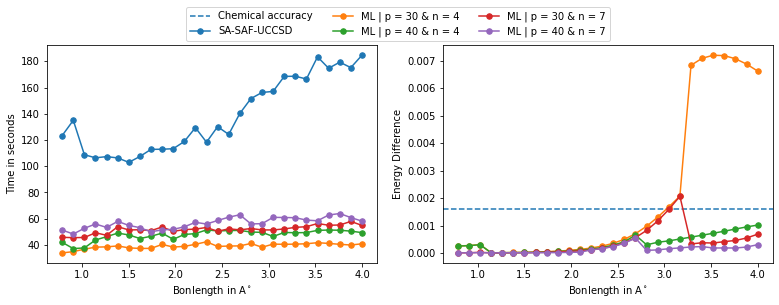

In [68]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

# LiH
l = 2
r = 30
left = 0.55
right = 4.0
No_of_points = 30

R = np.linspace(left, right, No_of_points)
R = R[l:r]




y = np.array([LiH_SA_1_ZAF_1_Time[2:], LiH_p_30_train_4_Time, LiH_p_40_train_4_Time, LiH_p_30_train_7_Time, LiH_p_40_train_7_Time])
labels = ['SA-SAF-UCCSD','ML | p = 30 & n = 4', 'ML | p = 40 & n = 4', 'ML | p = 30 & n = 7', 'ML | p = 40 & n = 7']
marc_color = ['C0', 'C1', 'C2', 'C3', 'C4']


fig, axs = plt.subplots(1, 2, figsize = (13,4))
ax1 = axs[0]
plots = []
for i in range (len(y)):
  p1 = ax1.plot(R, y[i], marker="o", color=marc_color[i], markersize=np.sqrt(30), label = labels[i])
  plots.append(p1)
  
ax1.set_xlabel('Bonlength in A$^\circ$')
ax1.set_ylabel('Time in seconds')
# plt.show()




ax2 = axs[1]

ax2.axhline(y = 0.0016, color='C0', linestyle='--', label = 'Chemical accuracy')

ax2.plot(R, np.array(LiH_p_30_train_4_Energies) - np.array(LiH_True_Energies[2:]), marker="o", color="C1",
         markersize=np.sqrt(30))

ax2.plot(R, np.array(LiH_p_40_train_4_Energies) - np.array(LiH_True_Energies[2:]), marker="o", color="C2",
         markersize=np.sqrt(30))

ax2.plot(R, np.array(LiH_p_30_train_7_Energies) - np.array(LiH_True_Energies[2:]), marker="o", color="C3",
         markersize=np.sqrt(30))

ax2.plot(R, np.array(LiH_p_40_train_7_Energies) - np.array(LiH_True_Energies[2:]), marker="o", color="C4",
         markersize=np.sqrt(30))

# plt.legend()
ax2.set_xlabel('Bonlength in A$^\circ$')
ax2.set_ylabel('Energy Difference')
handles, labels = [(a + b) for a, b in zip(ax2.get_legend_handles_labels(), ax1.get_legend_handles_labels())]
fig.legend(handles, labels, loc='upper center', ncol = 3, bbox_to_anchor=(0.5, 1.03))
plt.savefig('ML_time_and_energy_2.pdf', bbox_inches='tight')
plt.show()

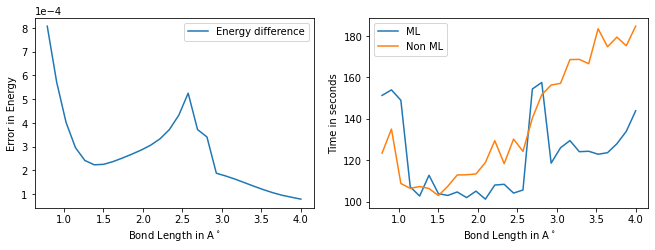

In [10]:
import matplotlib.pyplot as plt
import numpy as np

l = 2
r = 30
left = 0.55
right = 4.0
No_of_points = 30
R = np.linspace(left, right, No_of_points)
R=R[l:r]

plt.figure(figsize=(11, 3.5)) 

#Energy Error
plt.subplot(1,2,1)
plt.plot(R, np.array(LiH_L_BFGS_B_Energies[2:]) - np.array(LiH_SA_1_ZAF_1_Energies[2:]),label = 'Energy difference')
plt.ticklabel_format(style='sci', axis='y', scilimits=(-3,10))
plt.xlabel('Bond Length in A$^\circ$')
plt.ylabel('Error in Energy')
plt.legend()

#Time comparison
plt.subplot(1,2,2)
plt.plot(R, LiH_L_BFGS_B_Time[2:], label='ML')
plt.plot(R, LiH_SA_1_ZAF_1_Time[2:], label = 'Non ML')
plt.xlabel('Bond Length in A$^\circ$')
plt.ylabel('Time in seconds')
plt.legend()
plt.show()

### Plotting the Distance matrix

[19 11 16 18 17  2]


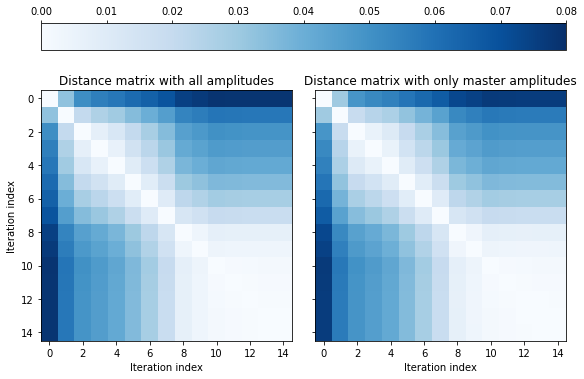

In [4]:
import matplotlib.pyplot as plt
p = 0.3
params = LiH_SA_1_ZAF_1_Params[10]
master_amp_idx = np.flip(np.argsort(np.abs(params[6,:])))[:int(np.floor(len(params[6, :])*p))]
print (master_amp_idx)
n_rows = len(params[:,0])
DM_1 = np.zeros((n_rows,n_rows))
DM_2 = np.zeros((n_rows,n_rows))

for i in range (n_rows):
    for j in range (i, n_rows):
      vec_1 = params[i,:]
      vec_2 = params[j,:]
      distance_1 = np.linalg.norm(vec_1-vec_2)
      DM_1[i,j] = distance_1
      DM_1[j,i] = distance_1

      master_vec_1 = params[i,master_amp_idx]
      master_vec_2 = params[j,master_amp_idx]
      distance_2 = np.linalg.norm(master_vec_1-master_vec_2)
      DM_2[i,j] = distance_2
      DM_2[j,i] = distance_2
      
      
# print (DM_1-DM_2)
# plt.figure(figsize=(10,10))

fig = plt.figure(figsize = (8,8), constrained_layout=True)
(subfig_l) = fig.subfigures(nrows=1, ncols=1)

axes_l = subfig_l.subplots(nrows=1, ncols=2, sharey=True)

im = axes_l.flat[0].imshow(DM_1, cmap = 'Blues', vmax = 0.08)
axes_l.flat[0].set_ylabel('Iteration index')
axes_l.flat[0].set_xlabel('Iteration index')
axes_l.flat[0].set_title('Distance matrix with all amplitudes')

im = axes_l.flat[1].imshow(DM_2, cmap = 'Blues', vmax = 0.08)
axes_l.flat[1].set_ylabel(' ')
axes_l.flat[1].set_xlabel('Iteration index')
axes_l.flat[1].set_title('Distance matrix with only master amplitudes')

# shared colorbar for left subfigure
subfig_l.colorbar(im, ax=axes_l, location='top')
plt.savefig('LIH_distance_matrix.pdf', bbox_inches='tight')
plt.show()


# plt.subplot(1,2,1)
# plt.imshow(DM_1, cmap='Blues', interpolation='nearest')
# plt.title('Distance matrix with all amplitudes')
# plt.xlabel('Iteration index')
# plt.ylabel('Iteration index')
# plt.subplot(1,2,2)
# plt.imshow(DM_2, cmap='Blues', interpolation='nearest')
# plt.title('Distance matrix with only master amplitudes')
# plt.xlabel('Iteration index')
# plt.savefig('LIH_distance_matrix.pdf', bbox_inches='tight')
# plt.show()